# Part I - (Supermarket Sales Exploration)
## Jaiyeola Ismail Adaiza

### Table of Content

- <a href="#intro">Introduction</a>
- <a href="#wrangle">Preliminary Wrangling</a>
- <a href="#uni">Univariate Exploration</a>
- <a href="#bi">Bivariate Exploration</a>
- <a href="#multi">Multivariate Exploration</a>
- <a href="#conclusion">Conclusion</a>

<div id="intro"></div>

## Introduction
 This dataset is obtained from Kaggle. 
https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales?select=supermarket_sales+-+Sheet1.csv

 The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. 
The metadata as recorded by the source is as follow:

 - Invoice id: Computer generated sales slip invoice identification number
 - Branch: Branch of supercenter (3 branches are available identified by A, B and C).
 - City: Location of supercenters
 - Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
 - Gender: Gender type of customer
 - Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
 - Unit price: Price of each product in $
 - Quantity: Number of products purchased by customer
 - Tax: 5% tax fee for customer buying
 - Total: Total price including tax
 - Date: Date of purchase (Record available from January 2019 to March 2019)
 - Time: Purchase time (10am to 9pm)
 - Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
 - COGS: Cost of goods sold
 - Gross margin percentage: Gross margin percentage
 - Gross income: Gross income
 - Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

<div id="wrangle"></div>

## Preliminary Wrangling


In [50]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime as dt

%matplotlib inline

> Let's load in our dataset and describe its properties through the questions below. We will motivate our exploration goals through this section.

In [51]:
df =pd.read_csv('supermarket_sales.csv')

In [52]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              1000 non-null object
Gender                     1000 non-null object
Product line               1000 non-null object
Unit price                 1000 non-null float64
Quantity                   1000 non-null int64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Date                       1000 non-null object
Time                       1000 non-null object
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 132.9+ KB


In [54]:
df.shape

(1000, 17)

In [55]:
# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [56]:
# Add columns for months and year
df['month'] = df['Date'].dt.strftime("%B")
df['year'] = df['Date'].dt.year
df['year'] = df['year'].astype('object')

In [57]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
month                              object
year                               object
dtype: object

### What is the structure of your dataset?

> The dataset  contains 1000 rows and 19 columns (after feature engineering) made ofa combination of qualitative and quantitative variables. The datatype for each column are as follows:

    Invoice ID                  object
    Branch                      object
    City                        object
    Customer type               object
    Gender                      object
    Product line                object
    Unit price                 float64
    Quantity                     int64
    Tax 5%                     float64
    Total                      float64
    Date                        datetime64[ns]
    Time                        object
    Payment                     object
    cogs                       float64
    gross margin percentage    float64
    gross income               float64
    Rating                     float64
    month                              object
    year                               object

### What is/are the main feature(s) of interest in your dataset?

> It would be very interesting to see the trend of sales by product line, putting into consideration the cost of goods sold, total sales and the gross income per product line. The business can leverage strategy to optimise product lines that has the capability to create more fortune for the business.

> It will also be interesting to see performance by branch and exploring count of sales by variables such as gender, customer type would give a good idea of our customer persona and enable the business focus on the customer or business segment that matters.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Interesting variables supplied in the dataset that would be great in eploring our features of interest includes: product line, total sales, cost of goods sold, gross income, branch, customer segment, etc.

<div id="uni"></div>

## Univariate Exploration

This section would focus on exploring based on a single variable in the dataset

### Count of Sales by Payment Channel
What is the sales count by payment channel?

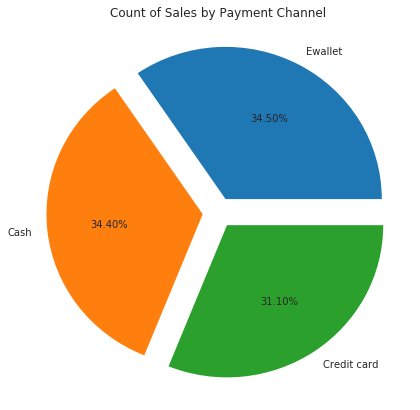

In [58]:
plt.figure(figsize=(7,7))
plt.title('Count of Sales by Payment Channel')
Payment = df.Payment.value_counts()
plt.pie(Payment, labels = Payment.index, explode=[0.1, 0.1, 0.1], autopct= "%1.2f%%");

> 34.50% of customers used Ewallet as their prefer mode of payment which accounts for the highest channel used for transactions. The Credit card channel being the lowest channel used for transaction recorded 31.10%of Sales count. The difference in the count of sales across the 3 channels is however not too significant

### Count of Sales by Product Line
What is the sales count by product line?

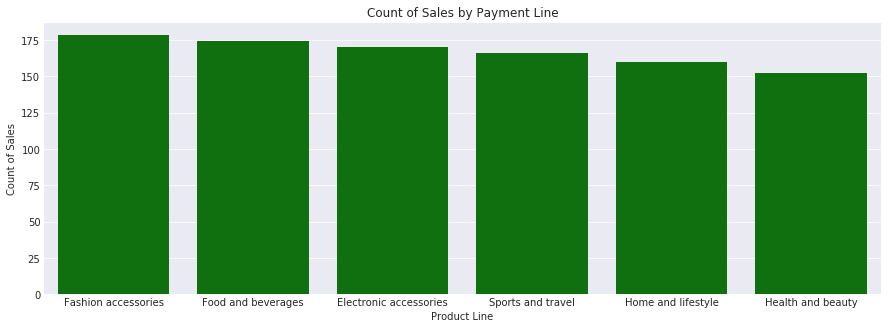

In [59]:
plt.figure(figsize=(15,5))
plt.title('Count of Sales by Payment Line')
lineorder = df['Product line'].value_counts().index
sb.countplot(x='Product line', data=df, color='green', order=lineorder)
plt.xlabel('Product Line')
plt.ylabel('Count of Sales');

> The best performing product line in terms of count of sales is Fashion accessories while health and beauty recorded the lowest count of sales. However we need to ask, Did this translate to revenue for the business? We will explore this further in the Bivariate section.

### Count of Sales by City
What is the sales count by city?

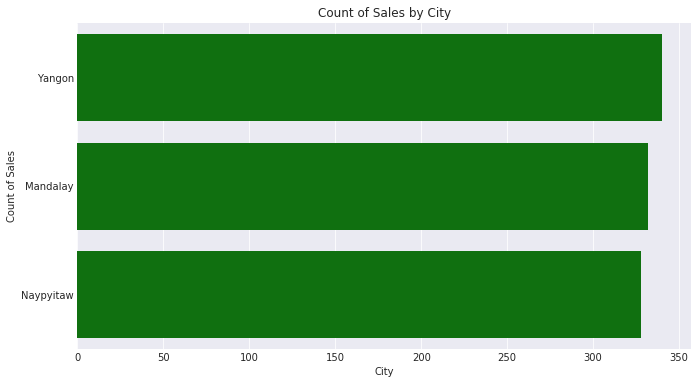

In [60]:
plt.figure(figsize=(11, 6))
plt.title('Count of Sales by City')
cityorder = df['City'].value_counts().index
sb.countplot(y='City', data=df, color='green', order=cityorder)
plt.xlabel('City')
plt.ylabel('Count of Sales');

> The highest count of sales was recorded by Yangon city.

### Count of Sales by Gender
What is the sales count by gender?

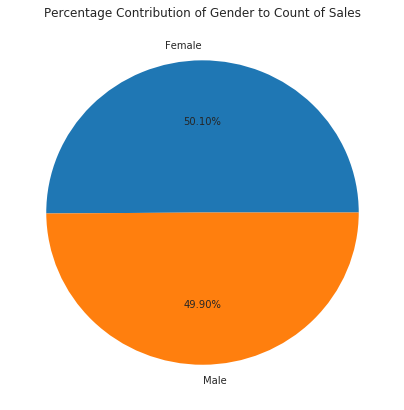

In [61]:
plt.figure(figsize=(7,7))
plt.title('Percentage Contribution of Gender to Count of Sales')
gender_count = df.Gender.value_counts()
plt.pie(gender_count, labels = gender_count.index, autopct= "%1.2f%%");

> There is a balance between our male and female customers in terms of count of sales.Male recorded 49.90% while female customers recorded 50.10%

### Percentage Contribution of Branch to Count of Sales
What is the sales count by branch?

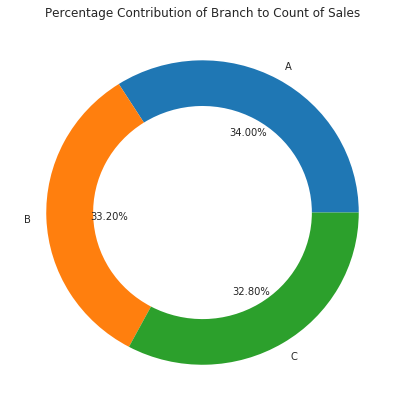

In [62]:
plt.figure(figsize=(7,7))
plt.title('Percentage Contribution of Branch to Count of Sales')
branch_count = df['Branch'].value_counts()
plt.pie(branch_count, labels= branch_count.index, wedgeprops = {'width':0.3}, autopct= "%1.2f%%");

> Branch A recorded the highest count of sales of 34% however with little difference compared to other branches

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  The best performing product line in terms of count of sales is Fashion accessories while health and beauty recorded the lowest count of sales. However we need to ask, Did this translate to revenue for the business? We will explore this further in the Bivariate section.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No feature engineering was performed in this section. We had handled this under the preliminary wrangling. However it would become necessary to further explore the categories with highest count of sales to know if this actually recorded the equivalent high sales.

<div id="bi"></div>

## Bivariate Exploration
This section would focus on exploring based on charts with two variables in the dataset

In [63]:
# Add function to plot Barcharts 
def plot_bar(x, y, data, title = None, xlabel = None, ylabel=None, color = None, order=None):
     sb.set_style('darkgrid')
     sb.barplot(y=y, x=x, data=data, ci=None, estimator=sum, color=color, order=order)
     plt.title(title, fontsize = 17)
     plt.xlabel(xlabel,  fontsize = 8)
     plt.ylabel(ylabel, fontsize = 8)

### Quantity Sold by Product Line 
Which product line recorded the highest quantity of sales?

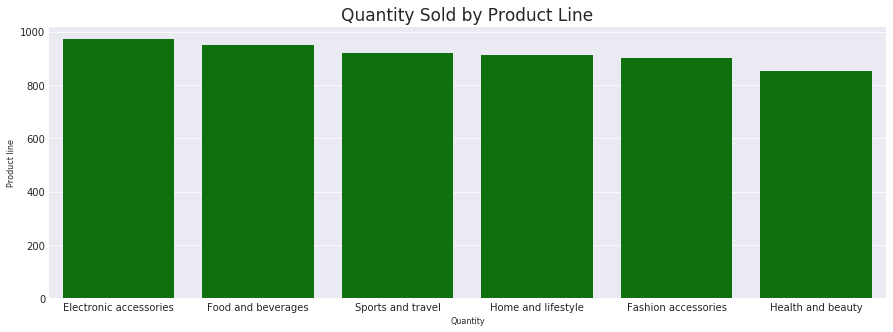

In [64]:
plt.figure(figsize=(15,5))
qtyorder= df.groupby('Product line').sum().Quantity.sort_values(ascending=False).index
plot_bar('Product line','Quantity', df, title='Quantity Sold by Product Line', xlabel = 'Quantity', ylabel='Product line', color='green', order=qtyorder)

> Electronic accessories recorded the highest quantity of sales and health and beaauty recorded the lowest quantity. Did recording highest quantity of sales equivalent to recording highest total sales? Let's explore further...

### Total Sales by Product Line 
What is the total sales by product line? Did Electronic accessories recorded the highest total sales while health and beauty recorded the lowest sales?

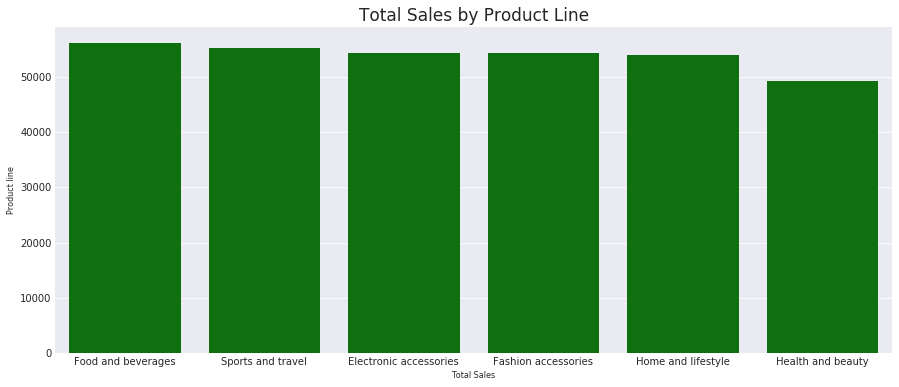

In [65]:
plt.figure(figsize=(15,6))
torder= df.groupby('Product line').sum().Total.sort_values(ascending=False).index
plot_bar('Product line','Total', df, title='Total Sales by Product Line', xlabel = 'Total Sales', ylabel='Product line', color='green', order=torder)

> As opposed to the expectation that Electronic accessoriees will record the highest sales based on recording the highest quantity sold, Food and beverages actually recorded the highest total sales. However health and beauty still recorded the lowest total sales as expected. Another thing that can then matter is how this translate to a gross income for the business. But let's start by checking the cost of goods sold sum by product line.

### Cost of Goods Sold by Product Line 
What is the cost of goods sold by product line?

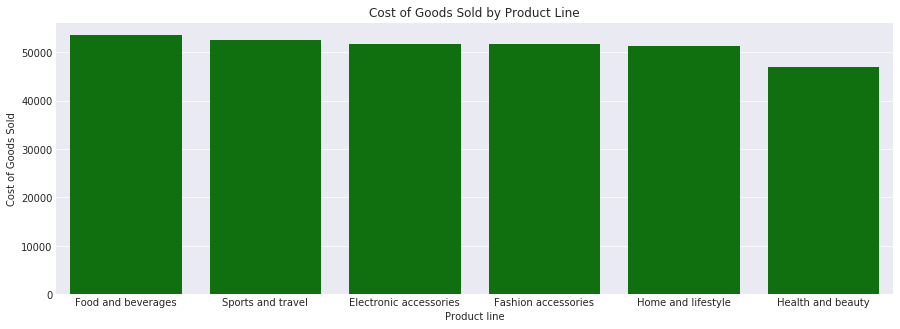

In [66]:
plt.figure(figsize=(15,5))
plt.title('Cost of Goods Sold by Product Line')
torder= df.groupby('Product line').sum().cogs.sort_values(ascending=False).index
sb.barplot(x='Product line', y='cogs', data=df, ci=None, estimator=sum,order=torder, color='green')
plt.ylabel('Cost of Goods Sold');

> One notable observation from the cost of goods sold chart is that it follows the same pattern as total sales.Food and beverages has the highest cost of goods sold while health and beauty still recorded the lowest cost of goods sold. Let's check our gross income to conclude on our most profitable product line

### Gross Income by Product Line 
What is the gross income by product line?

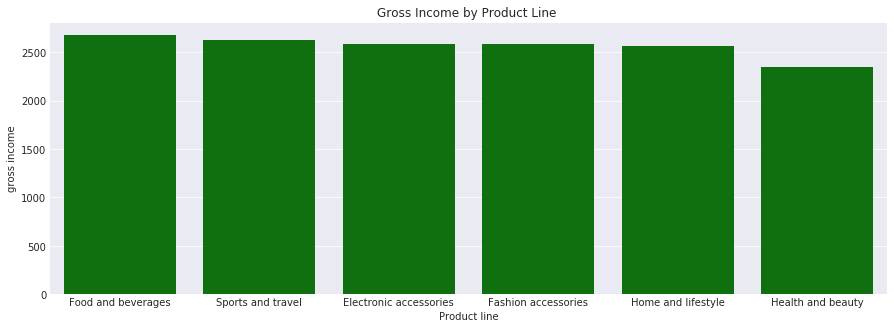

In [67]:
plt.figure(figsize=(15,5))
plt.title('Gross Income by Product Line ')
gorder= df.groupby('Product line').sum()['gross income'].sort_values(ascending=False).index
sb.barplot(x='Product line', y='gross income', data=df, ci=None, estimator=sum, order=gorder, color='green');

> Food and beverages recorded the highest gross income while health and beauty reccorded the lowest gross income.

### Total Sales by Payment Method
Which of our payments method recorded the highest transaction in terms of sales amount?

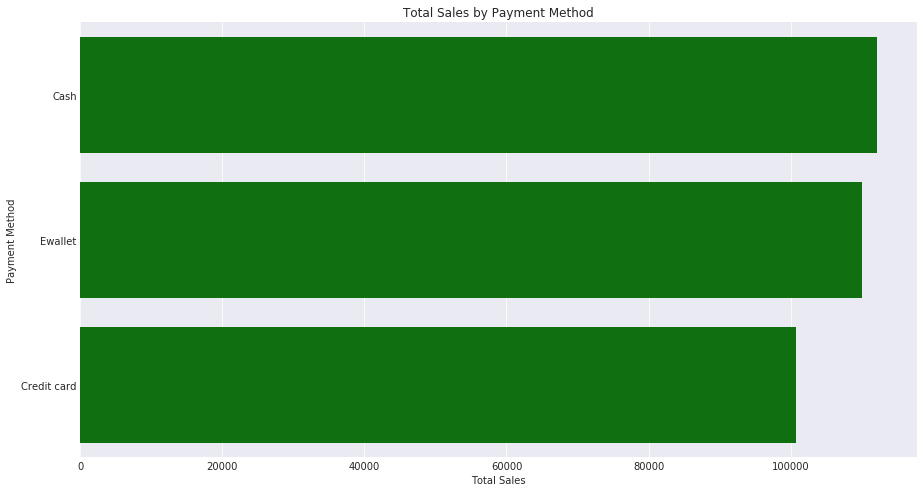

In [68]:
plt.figure(figsize=(15,8))
plt.title('Total Sales by Payment Method')
payorder= df.groupby('Payment').sum()['Total'].sort_values(ascending=False).index
sb.barplot(y='Payment', x='Total', data=df, ci=None, estimator=sum, order=payorder, color='green')
plt.ylabel('Payment Method')
plt.xlabel('Total Sales');

> Even though we earlier observed Ewallet recorded the highest number of count of sales, Cash actually has the highest transaction in terms of total sales amount.

### Percentage Sales Contribution by Branch
Which branch is best performing in terms of total sales amount?

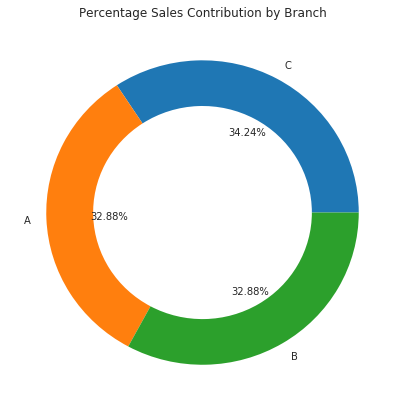

In [69]:
plt.figure(figsize=(7,7))
plt.title('Percentage Sales Contribution by Branch')
branch= df.groupby('Branch').sum()['Total'].sort_values(ascending=False)
plt.pie(branch.values, labels= branch.index, wedgeprops = {'width':0.3}, autopct= "%1.2f%%");

> Branch C is the best performing branch in terms of total sales amount with 34.24% contribution to total sales

### Monthly Sales Trend
What is our performance trend over the months?

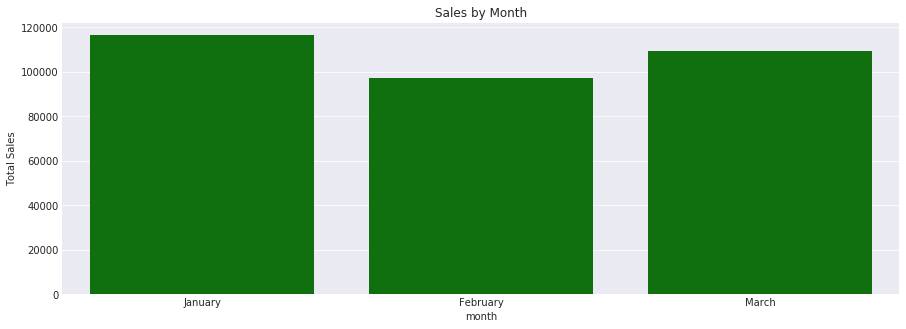

In [70]:
# Sales byMonth
plt.figure(figsize=(15,5))
plt.title('Sales by Month')
sb.barplot(x='month', y='Total', data=df, ci=None, estimator=sum, order=['January','February','March'], color='green')
plt.ylabel('Total Sales');

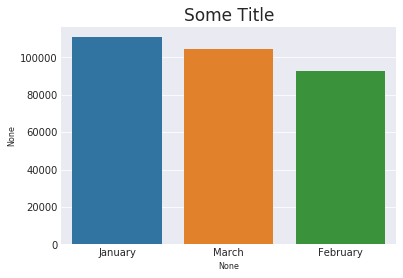

In [71]:
plot_bar('month', 'cogs', df,title="Some Title")

> We recorded the highest sales amount in January. Our sales is dropping consistently

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As opposed to the expectation that Electronic accessoriees will record the highest sales based on recording the highest quantity sold, Food and beverages actually recorded the highest total sales. However health and beauty still recorded the lowest total sales as expected. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One notable observation from the cost of goods sold chart is that it follows the same pattern as total sales.Food and beverages has the highest cost of goods sold while health and beauty still recorded the lowest cost of goods sold. 

<div id="multi"></div>

## Multivariate Exploration

This section would focus on exploring based on charts with three variables in the dataset

### Monthly Sales Trend by Branch
We earlier discovered Branch C contributed the highest to total sales. Did BranchC consistently recorded the highest sales through the month or growing through it?

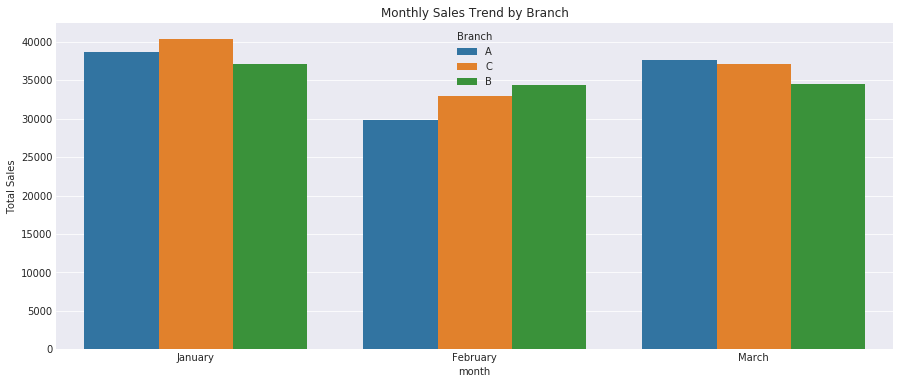

In [72]:
# Sales byMonth
plt.figure(figsize=(15,6))
plt.title('Monthly Sales Trend by Branch')
sb.barplot(x='month', y='Total', hue='Branch', data=df, ci=None, estimator=sum, order=['January','February','March'])
plt.ylabel('Total Sales');

> It is observed from above that Branch C only recorded the highest sales in January while Branch B recorded the highest in February and Branch A recorded the highest in March.The possibility for Branch C having the highest sales contribution then comes from the actual amount difference in sales leadership each month.

### Correlation Heat Map
Which top 3 variables would be the biggest determinant of the total sales amount in terms of correlation?

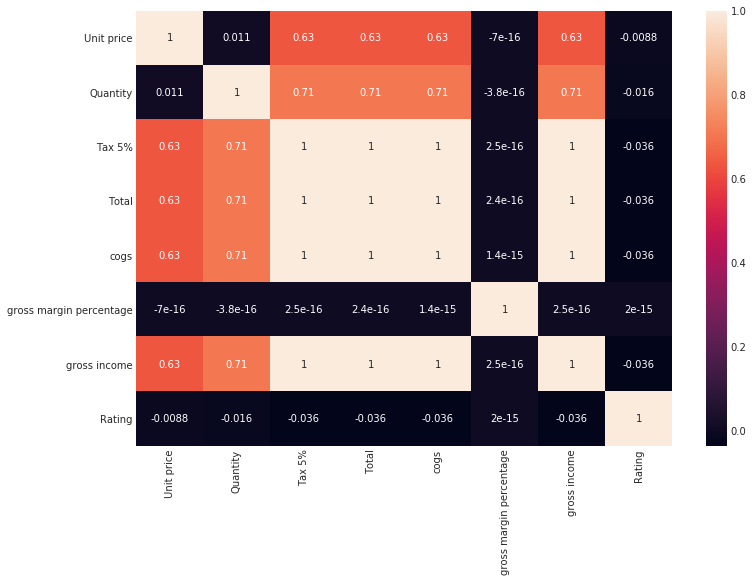

In [73]:
plt.figure(figsize=(12,8))

sb.heatmap(df.corr(), annot=True)

> Correlation close to +1 or -1 is a strong correlation while those closer to zero signifies weak correlation. Picking from the above, we can see that cost of goods sold, tax and gross inccome actually have a perfect correlation with the total sales column. It means an increase in any of these variables will bring forth an equivalent amount of increase in the total sales amount.

### Monthly Sales Trend by Customer Type
What is the sales trend by customer type?

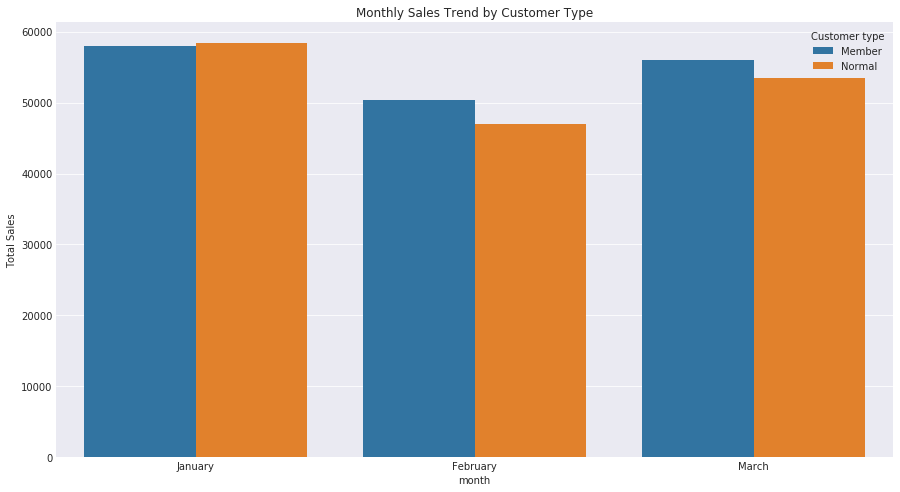

In [74]:
# Sales byMonth
plt.figure(figsize=(15,8))
plt.title('Monthly Sales Trend by Customer Type')
sb.barplot(x='month', y='Total', hue='Customer type', data=df, ci=None, estimator=sum, order=['January','February','March'])
plt.ylabel('Total Sales');

> Customer type member recorded the highest sales consistently throughout the period

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Cost of goods sold, tax and gross inccome actually have a perfect correlation with the total sales column. It means an increase in any of these variables will bring forth an equivalent amount of increase in the total sales amount.

### Were there any interesting or surprising interactions between features?

> It is observed that Branch C only recorded the highest sales in January while Branch B recorded the highest in February and Branch A recorded the highest in March.The possibility for Branch C having the highest sales contribution then comes from the actual amount difference in sales leadership each month.

<div id="conclusion"></div>

## Conclusions

#### Summary of Findings
 - 34.50% of customers used Ewallet as their prefer mode of payment which accounts for the highest channel used for transactions. 
 - The best performing product line in terms of count of sales is Fashion accessories.
 - The highest count of sales was recorded by Yangon city.
 - There is a balance between our male and female customers in terms of count of sales. Male recorded 49.90% while female customers recorded 50.10%
 - Branch A recorded the highest count of sales of 34% however with little difference compared to other branches
 - Electronic accessories recorded the highest quantity of sales and health and beauty recorded the lowest quantity. 
 - Food and beverages recorded the highest total sales and gross income.
 - Cost of goods sold chart follows the same pattern as total sales chart.
 - Cash payment method has the highest transaction in terms of total sales amount.
 - Branch C is the best performing branch in terms of total sales amount with 34.24% contribution to total sales
 - We recorded the highest sales amount in January. Our sales is dropping consistently
 - Cost of goods sold, tax and gross income actually have a perfect correlation with the total sales column. It means an increase in any of these variables will bring forth an equivalent amount of increase in the total sales amount.
 - Customer type member recorded the highest sales consistently throughout the period

#### Limitation
> A more detailed information around the availability  of payment methods across locations and digital channels uptime can actually give a more informed decision arround while customers have more preference for cash payment.
